In [1]:
import pandas as pd
import seaborn as sns

# Исследование характеристик кассет

## Кассеты

[SRAM 12(52T)](https://vamvelosiped.ru/kasseta-velosipednaya-sram-xg-1299-eagle-12v-10-52t-raimbow-2418101002.html)
[Shimano 12(51T)](https://vamvelosiped.ru/kasseta-velosipednaya-shimano-xt-m8100-10x51-12-skorostey-icsm8100051.html)
[Sugek 11(52T)](http://www.meghna.net/CS-M9011-11-Speed-11-50T-MTB-Cassette-Freewheel-pd6033814.html)
[Sugek 11(50T)](http://www.meghna.net/CS-M9011-11-Speed-11-50T-MTB-Cassette-Freewheel-pd6033814.html)

In [2]:
system12_sram = ["SRAM 12(52T)", [10, 12, 14, 16, 18, 21, 24, 28, 32, 36, 42, 52], [32]]
system12_shimano = ["Shimano 12(51T)", [10, 12, 14, 16, 18, 21, 24, 28, 33, 39, 45, 51], [32]]
system1152 = ["Sugek 11(52T)", [11, 13, 15, 18, 21, 24, 28, 32, 36, 42, 52], [32]]
system1150 = ["Sugek 11(50T)", [11, 13, 15, 18, 21, 24, 28, 32, 36, 42, 50], [32]]
system10 = [10, [11, 13, 15, 18, 21, 24, 28, 32, 37, 42], [24, 32, 42]]
system9 = [9, [12, 14, 16, 18, 21, 24, 26, 32, 36], [22, 30, 40]]

## На низких передачах
Система на 11 с 52 зубьями едет на 0.32 км/ч быстрее чем система на 11 с 50 зубьями

## На высоких передачах
Система на 12 едет на 4 км/ч быстрее чем система на 11

In [3]:
df = pd.DataFrame({
    "rear": [],
    "front": [],
    "g_ratio": [],
    "speed": [],
    "cadence": [],
    "system_n": []})

In [4]:
def ratio_calc(systems, cadence_l, wheel_l):
    for c in cadence_l:
        cadence = c
        for s in systems:
            system_n = s[0]
            rear = s[1]
            front = s[2]
            for f in front:
                front_t = int(f)
                for r in rear:
                    rear_t = int(r)
                    g_ratio = front_t / rear_t
                    speed = wheel_l * cadence * 60 * g_ratio
                    df.loc[len(df)] = [rear_t, front_t, g_ratio, speed, cadence, system_n]

In [5]:
# ratio_calc([system9, system10, system1150, system1152, system12_shimano, system12_sram], [90], 0.002288)
# ratio_calc([system1150, system1152, system12_shimano, system12_sram], [90], 0.002288)
# ratio_calc([system9, system10], [90], 0.002288)
# ratio_calc([system1150, system9], [90], 0.002288)
ratio_calc([system1150], [90], 0.002288)

In [6]:
df

,rear,front,g_ratio,speed,cadence,system_n
0,11,32,2.909091,35.942400,90,Sugek 11(50T)
1,13,32,2.461538,30.412800,90,Sugek 11(50T)
2,15,32,2.133333,26.357760,90,Sugek 11(50T)
3,18,32,1.777778,21.964800,90,Sugek 11(50T)
4,21,32,1.523810,18.826971,90,Sugek 11(50T)
5,24,32,1.333333,16.473600,90,Sugek 11(50T)
6,28,32,1.142857,14.120229,90,Sugek 11(50T)
7,32,32,1.000000,12.355200,90,Sugek 11(50T)
8,36,32,0.888889,10.982400,90,Sugek 11(50T)
9,42,32,0.761905,9.413486,90,Sugek 11(50T)


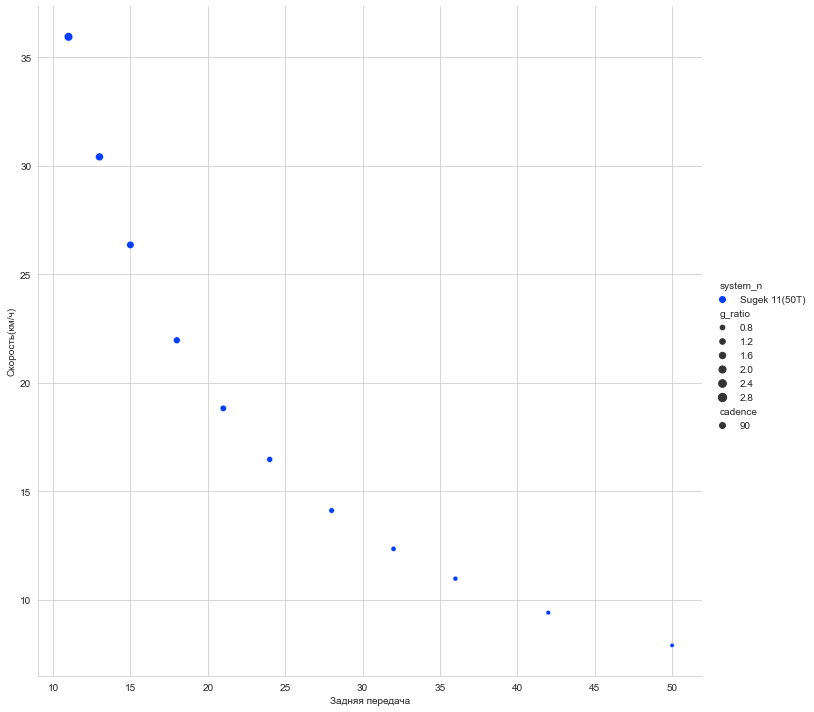

In [7]:
sns.relplot(
    data=df,
    x="rear", y="speed", hue="system_n", size="g_ratio", palette="bright", height=10, style="cadence"
).set_axis_labels("Задняя передача", "Скорость(км/ч)")

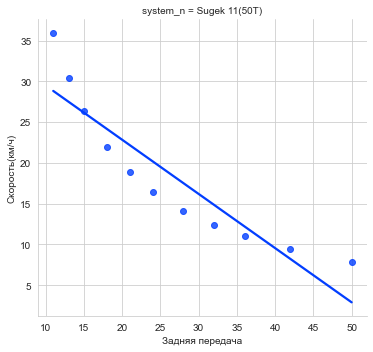

In [8]:
sns.lmplot(
    data=df,
    x="rear", y="speed", hue="system_n", col="system_n",
    col_wrap=2, ci=None, palette="bright", height=5,
).set_axis_labels("Задняя передача", "Скорость(км/ч)")

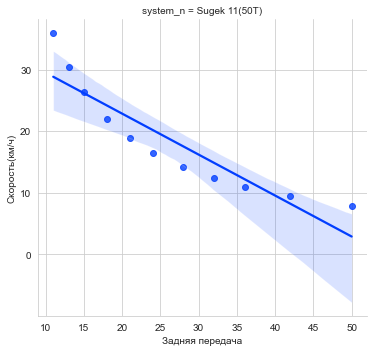

In [9]:
sns.lmplot(
    data=df,
    x="rear", y="speed", hue="system_n", col="system_n",
    col_wrap=2, palette="bright", height=5,
).set_axis_labels("Задняя передача", "Скорость(км/ч)")